### K-means Clustering

In [1]:
%pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     ---- -------------------------------- 30.7/282.6 kB 330.3 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/282.6 kB 330.3 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/282.6 kB 330.3 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 218.6 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 218.6 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 218.6 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 218.6 kB/s eta 0:00:01
     --------------- -------------------- 122.9/282.6 kB 232.7 kB/s eta 0:00:01
     --------------- -------------------- 122.9/282.6 kB 232.7 kB/s eta 0:00:01
     --------------- -------------------- 122.9/282.6 kB 232.7 kB/s eta 0:00:01
     --------------- -------------------- 122.9/282.6


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Read the mall customer dataset

In [3]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.columns = ['CustomerId','Gender','Age','Income','Spend']
df.head()

,CustomerId,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Classify similar customers on basis of income and spend

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


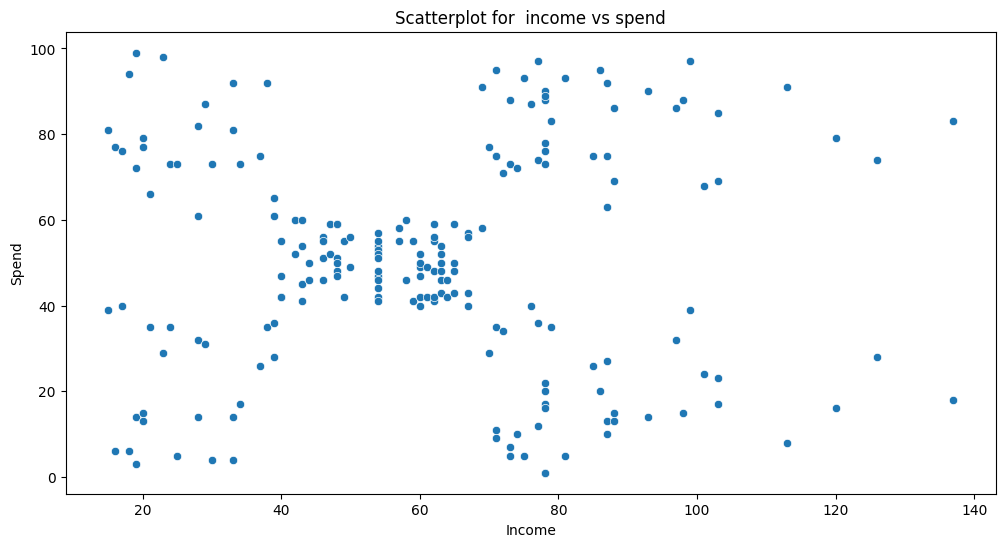

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Income', y='Spend')
plt.title('Scatterplot for  income vs spend')
plt.show()

### Seperate X value from your data

In [11]:
X = df[['Income', 'Spend']]
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Preprocess the X  data

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Income,Spend
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### For k mean method find optimal value of k with Elbow method

In [16]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans

e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

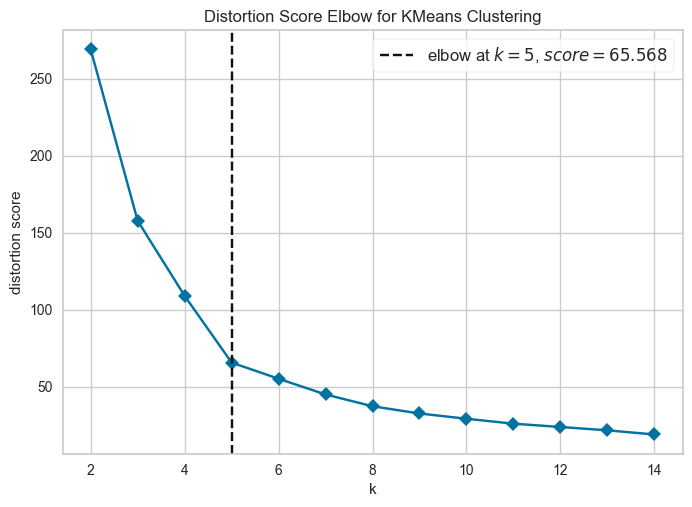

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [17]:
kelbow_visualizer(KMeans(),
                  X_pre,
                  k=(2,15),
                  timings=False)

### Create a kmeans model with number of clusters as 5

In [18]:
model = KMeans(n_clusters=5)
model.fit(X_pre)

e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [19]:
model.labels_

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3,
       1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 4, 0, 3, 0, 4, 0, 4, 0,
       3, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

In [20]:
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [24]:
X['Label']=model.labels_

C:\Users\HP\AppData\Local\Temp\ipykernel_13076\269228238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Label']=model.labels_


In [25]:
X

,Income,Spend,label,Label
0,15,39,1,1
1,15,81,2,2
2,16,6,1,1
3,16,77,2,2
4,17,40,1,1
...,...,...,...,...
195,120,79,0,0
196,126,28,4,4
197,126,74,0,0
198,137,18,4,4


In [26]:
X['Label'].unique()

array([1, 2, 3, 0, 4])

In [27]:
X[X['Label']==0]

,Income,Spend,label,Label
123,69,91,0,0
125,70,77,0,0
127,71,95,0,0
129,71,75,0,0
131,71,75,0,0
133,72,71,0,0
135,73,88,0,0
137,73,73,0,0
139,74,72,0,0
141,75,93,0,0


In [28]:
X[X['Label']==1]

,Income,Spend,label,Label
0,15,39,1,1
2,16,6,1,1
4,17,40,1,1
6,18,6,1,1
8,19,3,1,1
10,19,14,1,1
12,20,15,1,1
14,20,13,1,1
16,21,35,1,1
18,23,29,1,1


In [29]:
X[X['Label']==2]

,Income,Spend,label,Label
1,15,81,2,2
3,16,77,2,2
5,17,76,2,2
7,18,94,2,2
9,19,72,2,2
11,19,99,2,2
13,20,77,2,2
15,20,79,2,2
17,21,66,2,2
19,23,98,2,2


In [30]:
X[X['Label']==3]

,Income,Spend,label,Label
43,39,61,3,3
46,40,55,3,3
47,40,47,3,3
48,40,42,3,3
49,40,42,3,3
...,...,...,...,...
121,67,40,3,3
122,69,58,3,3
126,71,35,3,3
132,72,34,3,3


In [31]:
X[X['Label']==4]

,Income,Spend,label,Label
124,70,29,4,4
128,71,11,4,4
130,71,9,4,4
134,73,5,4,4
136,73,7,4,4
138,74,10,4,4
140,75,5,4,4
144,77,12,4,4
146,77,36,4,4
148,78,22,4,4


### Visualize above clusters

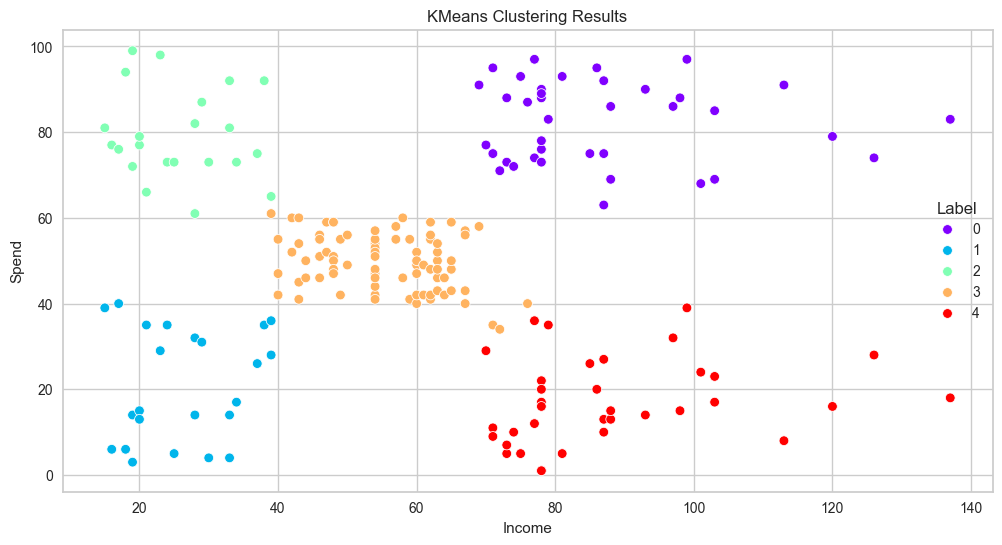

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=X, x='Income', y='Spend', hue='Label', palette='rainbow')
plt.title('KMeans Clustering Results')
plt.show()

### Cluster similar customers on basis of age,income and spending

In [34]:
X2 = df[['Age','Income','Spend']]
X2

,Age,Income,Spend
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [35]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())]).set_output(transform='pandas')
X2_pre = num_pipe2.fit_transform(X2)

In [37]:
X2_pre = num_pipe2.fit_transform(X2)
X2_pre.head()

,Age,Income,Spend
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

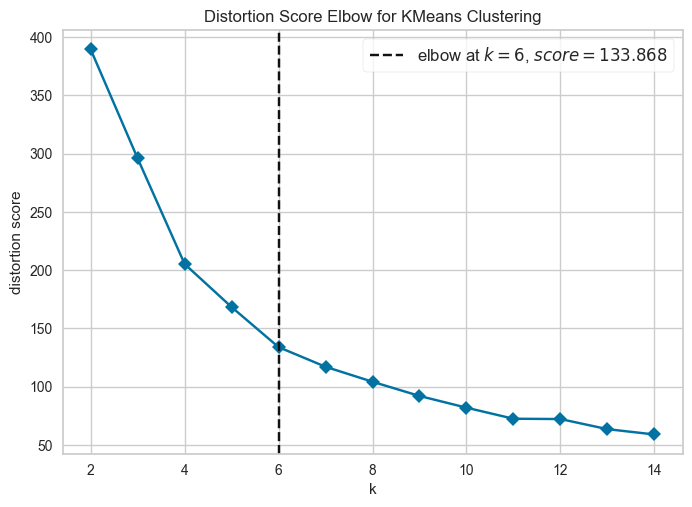

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [38]:
kelbow_visualizer(KMeans(),
                  X2_pre,
                  k=(2, 15),
                  timings=False)

In [39]:
model2 = KMeans(n_clusters=6)
model2.fit(X2_pre)

e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [40]:
model2.labels_

array([5, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 2, 5, 0, 3,
       0, 5, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1,
       3, 1, 4, 1, 4, 1, 3, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [41]:
X2['Label'] = model2.labels_

C:\Users\HP\AppData\Local\Temp\ipykernel_13076\3963453442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['Label'] = model2.labels_


In [42]:
X2.head()

,Age,Income,Spend,Label
0,19,15,39,5
1,21,15,81,5
2,20,16,6,0
3,23,16,77,5
4,31,17,40,0


In [43]:
X2['Label'].unique()

array([5, 0, 2, 3, 1, 4])

In [44]:
for i in range(6):
    print(f'Cluster Number : {i}\n')
    display(X2[X2['Label']==i])
    print('\n=====================================================\n')

Cluster Number : 0



,Age,Income,Spend,Label
2,20,16,6,0
4,31,17,40,0
6,35,18,6,0
8,64,19,3,0
10,67,19,14,0
12,58,20,15,0
14,37,20,13,0
16,35,21,35,0
18,52,23,29,0
20,35,24,35,0




Cluster Number : 1



,Age,Income,Spend,Label
123,39,69,91,1
125,31,70,77,1
127,40,71,95,1
129,38,71,75,1
131,39,71,75,1
133,31,72,71,1
135,29,73,88,1
137,32,73,73,1
139,35,74,72,1
141,32,75,93,1




Cluster Number : 2



,Age,Income,Spend,Label
40,65,38,35,2
46,50,40,55,2
50,49,42,52,2
53,59,43,60,2
54,50,43,45,2
55,47,43,41,2
56,51,44,50,2
57,69,44,46,2
59,53,46,46,2
60,70,46,56,2




Cluster Number : 3



,Age,Income,Spend,Label
43,31,39,61,3
47,27,40,47,3
48,29,40,42,3
49,31,40,42,3
51,33,42,60,3
52,31,43,54,3
58,27,46,51,3
61,19,46,55,3
65,18,48,59,3
68,19,48,59,3




Cluster Number : 4



,Age,Income,Spend,Label
126,43,71,35,4
128,59,71,11,4
130,47,71,9,4
134,20,73,5,4
136,44,73,7,4
140,57,75,5,4
144,25,77,12,4
146,48,77,36,4
148,34,78,22,4
150,43,78,17,4




Cluster Number : 5



,Age,Income,Spend,Label
0,19,15,39,5
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5


### Install plotly and nbformat

In [45]:
%pip install plotly nbformat

   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB 1.3 MB/s eta 0:00:13
   ---------------------------------------- 0.0/15.6 MB 1.3 MB/s eta 0:00:13
   ---------------------------------------- 0.0/15.6 MB 1.3 MB/s eta 0:00:13
   ---------------------------------------- 0.0/15.6 MB 1.3 MB/s eta 0:00:13
   ---------------------------------------- 0.1/15.6 MB 182.2 kB/s eta 0:01:26
   ---------------------------------------- 0.1/15.6 MB 262.6 kB/s eta 0:01:00
   ---------------------------------------- 0.1/15.6 MB 262.6 kB/s eta 0:01:00
   ---------------------------------------- 0.1/15.6 MB 262.6 kB/s eta 0:01:00
   ---------------------------------------- 0.1/15.6 MB 211.6 kB/s eta 0:01:14
   ---------------------------------------- 0.1/15.6 MB 212.1 kB/s eta 0:01:14
   ---------------------------------------- 0.1/15.6 MB 230.3 kB/s eta 0:01:08
   ---------------------------------------- 0.1/15.6 MB 230.3 kB/s et


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Visualize the 3d scattrplot for clustering

In [46]:
import plotly.express as px

In [48]:
fig = px.scatter_3d(data_frame=X2, x='Age', y='Income', z='Spend', color='Label')
fig.show()